# Logistic Regression for Sentiment Analysis

## Objective
Train and evaluate a **Logistic Regression model** for a **simple sentiment analysis task** using **word frequency features**.

## Dataset
I will be using a **custom sentiment dataset** provided by ChatGPT.


In [591]:
%matplotlib inline
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# stop words library
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\psilv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Getting data ready

In [760]:
# load data
pd.set_option('future.no_silent_downcasting', True)
# read and shuffle raw data
sentiment_df = pd.read_csv("./dataset/custom_sentiment_dataset.csv")

## 2. Preprocessing

### 2.1 Remove punctuation and filter out stop words

In [762]:
# convert text label into numerical label
sentiment_df["sentiment"] = sentiment_df["sentiment"].replace({"Positive Sentence": 1, "Negative Sentence": 0})

#remove punctuation
sentiment_df["sentence"] = sentiment_df["sentence"].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)

stop_words = set(stopwords.words('english'))

filtered_sentences = [" ".join([w for w in sentence.split() if w.lower() not in stop_words]) for sentence in sentiment_df["sentence"] ]

sentiment_df.insert(sentiment_df.columns.get_loc("sentiment"), "filtered_sentence", filtered_sentences)

sentiment_df = sentiment_df.sample(frac=1, random_state=42).reset_index(drop=True)


### 2.2. Feature Extraction

In [812]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words="english", min_df=2, max_features=1000)

vector = vectorizer.fit_transform(sentiment_df["filtered_sentence"])

sentiment_analysis_df = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names_out())

sentiment_analysis_df = pd.concat([sentiment_analysis_df, sentiment_df["sentiment"]], axis=1)

In [814]:
sentiment_analysis_df

,absolutely,amazing,customer,customer support,disappointed,experience,fantastic,food,friendly,friendly helpful,...,quality,regret,service,slow,support,terrible,use,waste,worth,sentiment
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.737927,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.412508,0.444735,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.444735,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.674880,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.737927,0
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0
5,0.000000,0.000000,0.730022,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.683424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.621894,0.000000,0.000000,0.000000,0.783101,0.000000,0.000000,0
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,0.762582,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


## 3. Split Data

In [816]:
X = sentiment_analysis_df.drop("sentiment", axis=1)
y = sentiment_analysis_df["sentiment"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train the Model (classifier)

In [818]:
clf = LogisticRegression(class_weight="balanced", random_state=42)

#fit the train data
clf.fit(X_train, y_train)

clf.score(X_test, y_test)   

0.7142857142857143

## 5. Test the Model (Classifier)

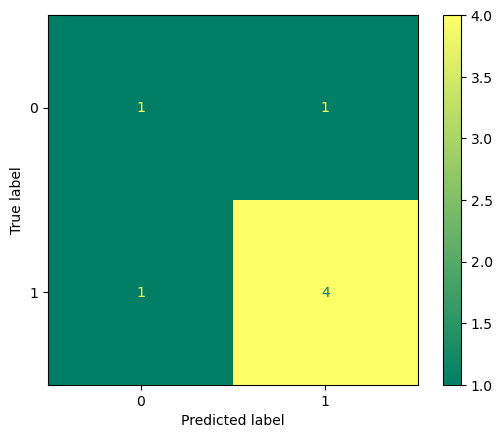

In [820]:
# predict sentiments
y_preds = clf.predict(X_test)

# evaluate accuracy
acc_score = accuracy_score(y_test, y_preds)
acc_score

# Confusion Matrix: how well my model is performing
cm_log_reg = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_log_reg,
                      display_labels=clf.classes_)

disp.plot(cmap="summer");



In [822]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.80      0.80      0.80         5

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7



In [824]:
print(y_train.value_counts())

sentiment
0    13
1    11
Name: count, dtype: int64
